In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [58]:
# !pip3 install matplotlib
# !pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.1 MB/s eta 0:00:00a 0:00:01


In [98]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [282]:
train = pd.read_csv("../data/train.csv")

In [10]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [13]:
train[train['총연체금액'] > 0].iloc[:60]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
122,TRAIN_00122,11460000,36 months,10+ years,RENT,38400000,32.56,35,부채 통합,0,461676,398172.0,21792.0,0.0,E
671,TRAIN_00671,13440000,60 months,9 years,OWN,127200000,22.59,28,신용 카드,1,713760,1001016.0,18000.0,0.0,E
946,TRAIN_00946,15240000,36 months,2 years,RENT,74400000,16.45,48,신용 카드,0,1159212,260448.0,46536.0,0.0,A
1914,TRAIN_01914,17580000,60 months,10+ years,MORTGAGE,90000000,27.18,29,부채 통합,2,632292,1366848.0,25284.0,0.0,F
1975,TRAIN_01975,28800000,60 months,10+ years,MORTGAGE,276000000,17.24,33,부채 통합,0,660552,714312.0,33996.0,0.0,C
2485,TRAIN_02485,36000000,60 months,10+ years,MORTGAGE,90000000,6.91,14,주택 개선,0,1620456,5653416.0,52308.0,0.0,F
2959,TRAIN_02959,30000000,36 months,Unknown,MORTGAGE,71568000,28.87,24,신용 카드,0,2254236,511236.0,46500.0,0.0,A
3388,TRAIN_03388,8640000,36 months,10+ years,OWN,43800000,21.44,15,부채 통합,0,593940,277164.0,18000.0,0.0,C
3526,TRAIN_03526,25920000,36 months,6 years,RENT,168000000,8.42,20,신용 카드,0,1066728,497808.0,40716.0,0.0,B
3820,TRAIN_03820,25200000,36 months,2 years,OWN,90000000,8.34,33,신용 카드,0,1241244,414624.0,39588.0,0.0,B


In [14]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [ ]:
train["총상환금"] = train["총상환원금"] + train["총상환이자"] + 

In [ ]:
train["남은대출금액"] = train["대출금액"] - train["총상환금"]
train = train.drop(columns=['총상환금'])

가정1. 총연체금액이 0 일 때 -> 성실히 매달 갚은 사람이다.

가정2. 상환개월이 0 이상이어야 한다.

    
1. 대출 금액 / 대출 기간 = 월원금상환금
2. 총상환원금 / 월원금상환금 = 상환개월 (갚은 개월 수)
3. 총상환이자 / (대출금액 * 상환개월) = 이자율   (총 이자  = 대출금액(알고) * 이자율 * 상환개월)
4. 나머지 nan값 이자율의 mean으로 대체

- 이럼 ```이자율 피쳐```가 생성.

이자율 피쳐 -> 여러가지 해볼 수 있음.

- 상환개월의 nan값, 즉 연체금액 0 이상인 사람들의 상환 개월을 알 수 있다. -> ```상환개월 피쳐 생성```
- 연체가 있는 사람들에 한해서 


이자율



In [136]:
bb = train.copy()

train = bb.copy()

In [283]:
train["갚은금액"] = train["총상환원금"] + train["총상환이자"]

# 가정 1
conv1 = train["총연체금액"] == 0 

# 가정 2
conv2 = train["갚은금액"] > 0  

data = train[conv1 & conv2]

# 월원금상환금 피쳐 생성
data['대출기간'] = data['대출기간'].astype(str).str[:3].astype(int) # 말이 됨
data["월원금상환금"] = data["대출금액"] / data["대출기간"]

# 상환개월 피쳐 생성
data["상환개월"] = round(data["총상환원금"] / data["월원금상환금"])

# 이자율 피쳐 생성
data["이자율"] = data["총상환이자"] / (data['대출금액'] * data['상환개월'])

# null값 변경
data = data.replace([np.inf, -np.inf], np.nan)

# 결측치 채우기
data["이자율"].fillna(data["이자율"].mean(), inplace = True)

# 원본 데이터에 복원
train["상환개월"] = data["상환개월"]
train["이자율"] = data["이자율"]

# 개수 확인
# train["상환개월"].isna().sum(),train["이자율"].isna().sum()

# 이자율 결측치 채우기 (연체 한 사람들)
train["이자율"].fillna(train["이자율"].mean(), inplace = True)

# 갚은 금액 0인 사람들 상환개월 0으로 채우기
conv3 = train["갚은금액"] == 0

li = train[conv3].index.to_list()
train.loc[li, '상환개월'] = 0

# 연체한 사람들 상환 개월 구하기

bb = train[train['상환개월'].isna()]

bb["월상환이자"] = bb["대출금액"] * bb['이자율']

bb['대출기간'] = bb['대출기간'].astype(str).str[:3].astype(int) # 말이 됨
bb["월원금상환금"] = bb["대출금액"] / bb["대출기간"]

bb["상환개월"] = round(bb["총상환이자"] / bb["월상환이자"])

train.loc[train[train["상환개월"].isna()].index.to_list(), "상환개월"] = bb["상환개월"]

In [284]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,갚은금액,상환개월,이자율
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.0,0.0,0.012154
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,607632.0,2.0,0.008127
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1080588.0,3.0,0.004221
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,478932.0,1.0,0.010632
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,377496.0,1.0,0.008275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,1466748.0,2.0,0.017089
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,1438812.0,1.0,0.029690
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,1730364.0,4.0,0.004188
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,2196444.0,3.0,0.017480


In [25]:
# 월원금상환금
train['대출기간'] = train['대출기간'].astype(str).str[:3].astype(int) # 말이 됨
train['월원금상환금'] = round(train['대출금액']/train['대출기간']) # 말이 됨

# 상환개월
train['상환개월'] = np.trunc(train['총상환원금']/train['월원금상환금']) #총연체 금액이 있으면?


# 이자율
train['이자율'] = train['총상환이자']/ (train['대출금액'] * train['상환개월'])

train.drop(['월원금상환금', '총상환이자'], axis=1, inplace=True)

In [ ]:
train['이자율'] = train['총상환이자']/ (train['대출금액'] * train['상환개월'])

In [26]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,월원금상환금,상환개월
0,TRAIN_00000,12480000,36,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,346667.0,0.0
1,TRAIN_00001,14400000,60,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,240000.0,1.0
2,TRAIN_00002,12000000,36,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,333333.0,2.0
3,TRAIN_00003,14400000,36,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,400000.0,0.0
4,TRAIN_00004,18000000,60,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,300000.0,0.0


In [ ]:
총 상환이자 = 대출금액 * 이자율 * 상환개월

## Categoric

- 데이터 모든 피쳐에 imbalanced가 있음
  - 아마 로그 변환?

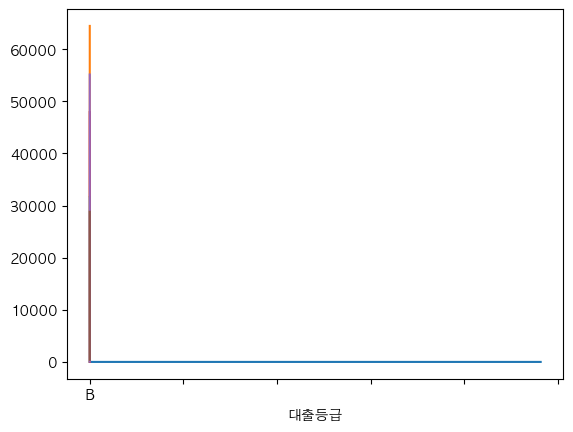

In [5]:
categoric_col = train.select_dtypes(include='object').columns # 범주형

for i in categoric_col:
    train[i].value_counts().plot()

In [6]:
categoric_col

Index(['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'], dtype='object')

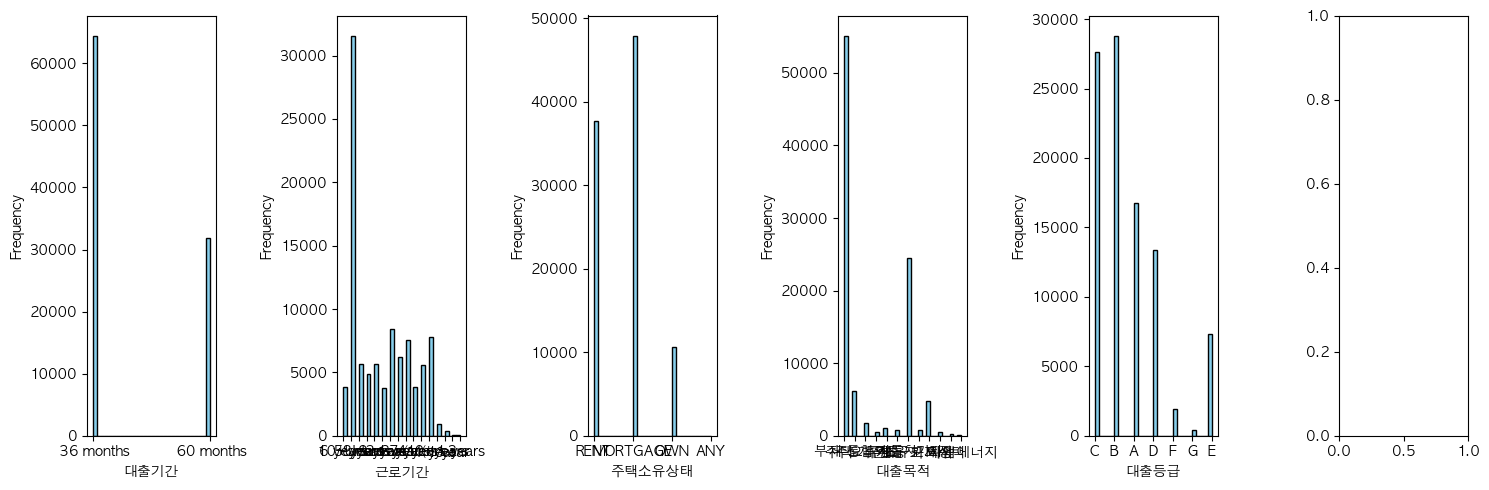

In [7]:
num_vars = len(categoric_col)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15, 5))

# 각 수치형 변수에 대해 히스토그램 그리기
for i, col in enumerate(categoric_col[1:]):
    axes[i].hist(train[col], bins=30, color='skyblue', edgecolor='black')
    # axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

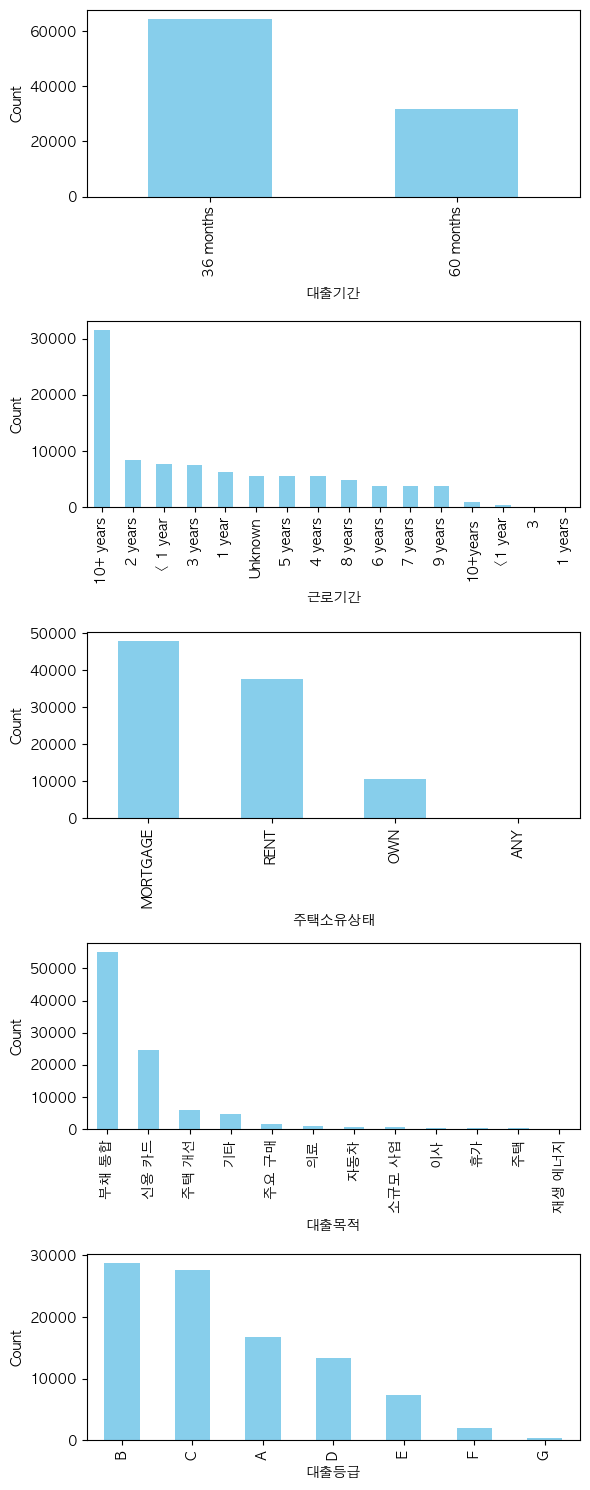

In [8]:
fig, axes = plt.subplots(nrows=len(categoric_col)-1, figsize=(6, 3 * (len(categoric_col)-1)))

for i, col in enumerate(categoric_col[1:]):
    train[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    # axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()

# 그래프 보여주기
plt.show()

In [9]:
for i in categoric_col:
    train[i] = np.log(train[i])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

## Numeric_col

대출 금액을 제외한 나머지 피쳐들의 이상치가 있음
- 이상치 제거?


In [10]:
numeric_col = train.select_dtypes(include='int64').columns # 수치형
numeric_col

Index(['대출금액', '연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금'], dtype='object')

In [11]:
train[numeric_col].describe()

,대출금액,연간소득,총계좌수,최근_2년간_연체_횟수,총상환원금
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,9.629400e+04
mean,1.830400e+07,9.392672e+07,25.304827,0.345681,8.225035e+05
std,1.032908e+07,9.956871e+07,12.088566,0.919119,1.027745e+06
min,1.200000e+06,0.000000e+00,4.000000,0.000000,0.000000e+00
25%,1.020000e+07,5.760000e+07,17.000000,0.000000,3.075720e+05
50%,1.680000e+07,7.800000e+07,24.000000,0.000000,5.976960e+05
75%,2.400000e+07,1.128000e+08,32.000000,0.000000,1.055076e+06
max,4.200000e+07,1.080000e+10,169.000000,30.000000,4.195594e+07


In [64]:
numeric_col

Index(['대출금액', '연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금'], dtype='object')

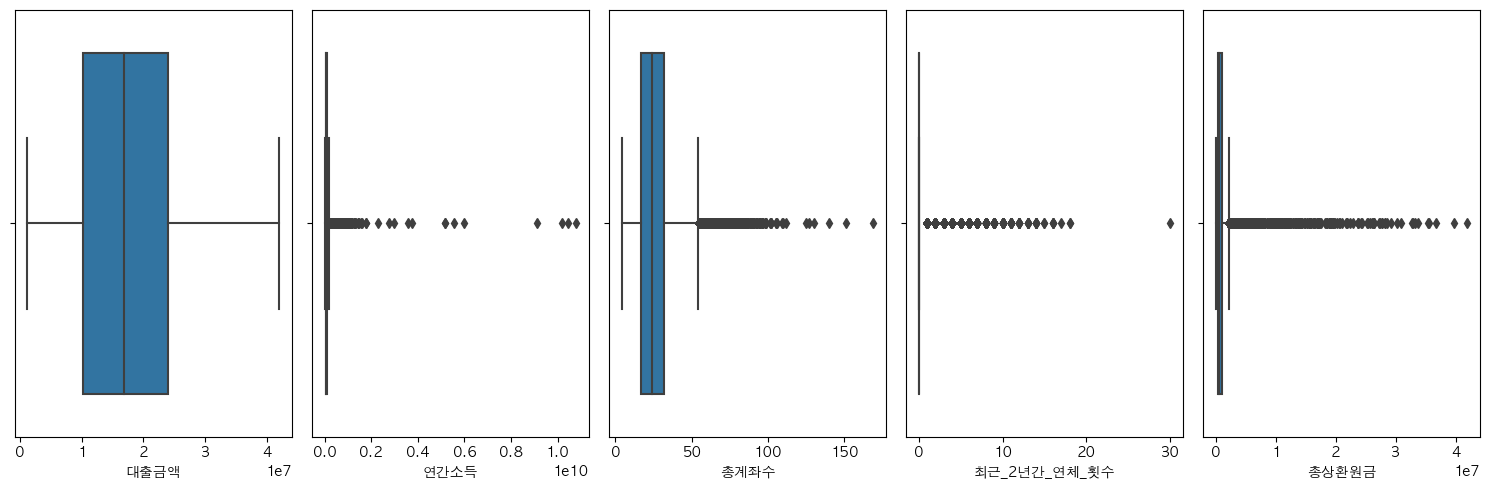

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_col = train.select_dtypes(include='int64').columns # 수치형

# 수치형 변수의 개수
num_vars = len(numeric_col)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15, 5))

# 각 수치형 변수에 대해 Box Plot 그리기
for i, col in enumerate(numeric_col):  # 처음 두 열은 제외
    sns.boxplot(x=train[col], ax=axes[i])

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

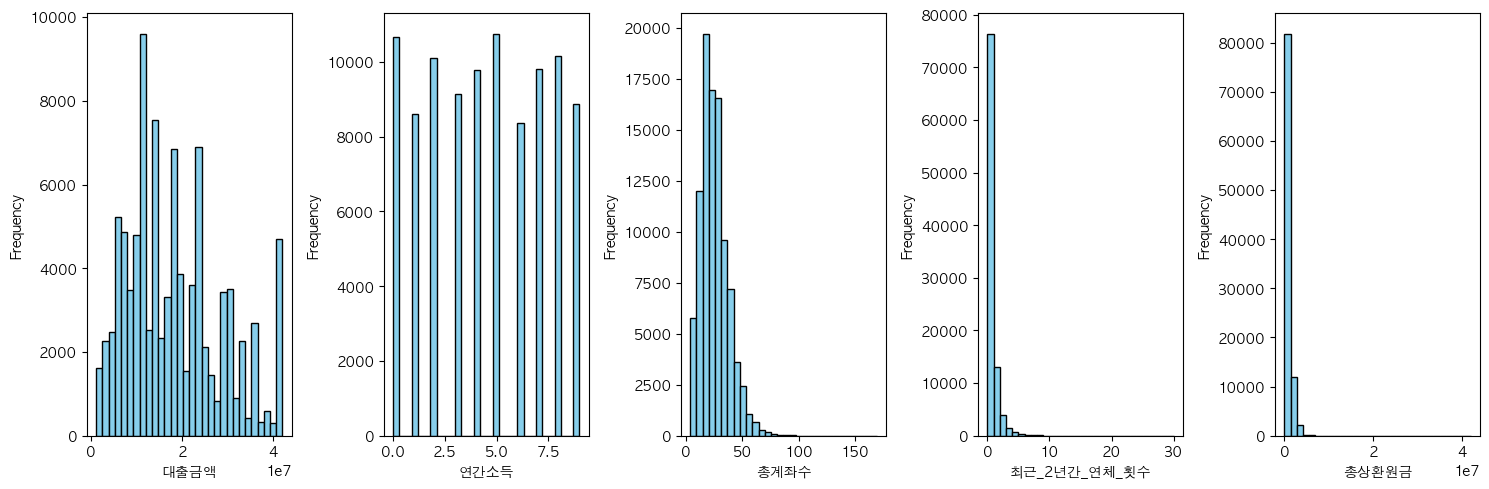

In [92]:
import matplotlib.pyplot as plt

numeric_col = train.select_dtypes(include='int64').columns # 수치형

# 수치형 변수의 개수
num_vars = len(numeric_col)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(15, 5))

# 각 수치형 변수에 대해 히스토그램 그리기
for i, col in enumerate(numeric_col):
    axes[i].hist(train[col], bins=30, color='skyblue', edgecolor='black')
    # axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [43]:
numeric_col

Index(['부채_대비_소득_비율', '총상환이자', '총연체금액', '연체계좌수'], dtype='object')

In [49]:
train["총연체금액"].value_counts()

총연체금액
0.0        96113
18000.0       65
20124.0        3
36000.0        3
31308.0        2
           ...  
19620.0        1
24300.0        1
44496.0        1
27900.0        1
38292.0        1
Name: count, Length: 109, dtype: int64

In [40]:
numeric_col

Index(['대출금액', '연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금'], dtype='object')

In [112]:
from scipy.stats import skew, kurtosis

numeric_col = train.select_dtypes(include='float64').columns # 수치형

# 각 수치형 변수에 대해 왜도와 첨도 계산
for col in numeric_col:
    skewness = skew(train[col])
    kurt = kurtosis(train[col])
    
    print(f'{col:} - Skewness: {skewness:.3f}, Kurtosis: {kurt:.3f}')
    print()

# 왜도: 0에 가까울 수록 대칭적
# 첨도: 3에 가까울 수록 뾰족함이 정규분포와 근사

연간소득 - Skewness: nan, Kurtosis: nan

부채_대비_소득_비율 - Skewness: 273.262, Kurtosis: 81121.012

총상환원금 - Skewness: nan, Kurtosis: nan

총상환이자 - Skewness: 2.171, Kurtosis: 6.795

총연체금액 - Skewness: 32.358, Kurtosis: 1230.071

연체계좌수 - Skewness: 15.278, Kurtosis: 283.836



In [109]:
train["연간소득"] = np.log(train["연간소득"])

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  float64
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  float64
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(6), int64(3), object(6)
memory usage: 11.0+ MB


In [113]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,18.092177,18.90,15,부채 통합,0,-inf,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,18.689180,22.33,21,주택 개선,0,12.830866,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,18.379859,8.60,14,부채 통합,0,13.741481,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,18.698312,15.09,15,부채 통합,0,12.694113,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,18.088503,25.39,19,주요 구매,0,12.339467,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,19.162618,9.33,33,신용 카드,0,13.789762,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,18.698312,5.16,25,주택 개선,0,13.277190,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,18.246327,11.24,22,신용 카드,0,14.213701,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,18.010153,17.30,21,부채 통합,2,14.136411,818076.0,0.0,0.0,D


In [ ]:
for i in categoric_col:
    train[i] = np.log(train[i])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [34]:
#연긴 소득 동일 빈도 비닝 (구간화)
train['연간소득'] = pd.qcut(train['연간소득'], q=10,labels=False)

In [39]:
train["총연체금액"].value_counts()

총연체금액
0.0        96113
18000.0       65
20124.0        3
36000.0        3
31308.0        2
           ...  
19620.0        1
24300.0        1
44496.0        1
27900.0        1
38292.0        1
Name: count, Length: 109, dtype: int64

In [50]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,4,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,8,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,6,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,8,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,4,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,9,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,8,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,5,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,3,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [ ]:
t

In [124]:
# df = pd.read_csv("EDA/gy_csv.csv")
df = pd.read_csv("EDA/kangjiwon/Untitled.ipynb")

# EDA/gy_csv.csv
# ㅁㄴㅇㅁㄴㅇㅁㄴㅇㅁㄴㅇㅁㄴㅇㅁㄴㅇㅁㄴㅇㅁㄴㅇ/EDA/gy_csv.csv

FileNotFoundError: [Errno 2] No such file or directory: 'Credit-rating-classification/EDA/kangjiwon/Untitled.ipynb'

In [57]:
df = df.drop("대출등급",axis = 1)

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["대출등급"] = le.fit_transform(df["대출등급"])

<Axes: >

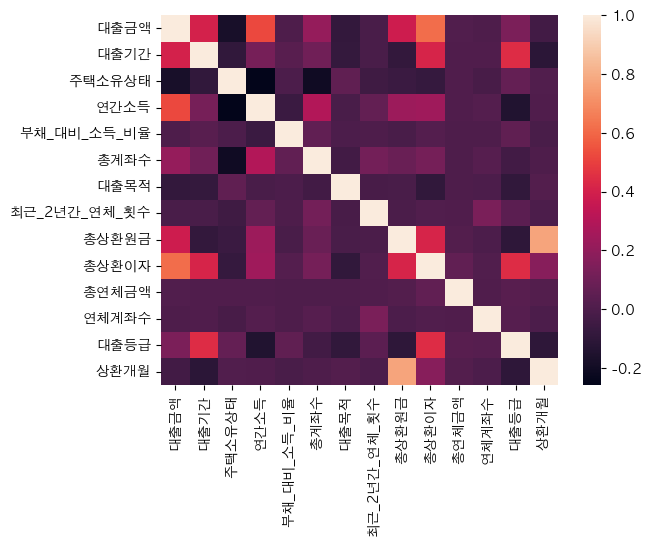

In [66]:
sns.heatmap(df.corr())

In [69]:
df.corr()

,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환개월
대출금액,1.000000,0.402573,-0.178338,0.523181,0.002263,0.212309,-0.087416,-0.014775,0.379061,0.615680,0.011853,0.000182,0.137049,-0.038401
대출기간,0.402573,1.000000,-0.094994,0.123629,0.030263,0.105956,-0.081022,-0.013857,-0.090007,0.412330,0.005247,0.006988,0.443839,-0.110226
주택소유상태,-0.178338,-0.094994,1.000000,-0.257365,-0.003804,-0.206314,0.056161,-0.049717,-0.061978,-0.078036,0.003980,-0.020041,0.069104,0.008651
연간소득,0.523181,0.123629,-0.257365,1.000000,-0.062755,0.293708,-0.012703,0.064244,0.232295,0.243553,0.005870,0.018150,-0.146323,0.004613
부채_대비_소득_비율,0.002263,0.030263,-0.003804,-0.062755,1.000000,0.058830,-0.005055,0.000699,-0.016180,0.018565,0.000711,0.000051,0.054121,-0.015354
총계좌수,0.212309,0.105956,-0.206314,0.293708,0.058830,1.000000,-0.040569,0.112092,0.083615,0.116299,0.000037,0.023652,-0.039991,0.000728
대출목적,-0.087416,-0.081022,0.056161,-0.012703,-0.005055,-0.040569,1.000000,-0.021538,-0.015648,-0.093444,-0.001425,-0.003757,-0.091413,0.014442
최근_2년간_연체_횟수,-0.014775,-0.013857,-0.049717,0.064244,0.000699,0.112092,-0.021538,1.000000,-0.010048,0.008095,0.004612,0.133632,0.039786,-0.004708
총상환원금,0.379061,-0.090007,-0.061978,0.232295,-0.016180,0.083615,-0.015648,-0.010048,1.000000,0.412385,0.015379,-0.005190,-0.101515,0.769248
총상환이자,0.615680,0.412330,-0.078036,0.243553,0.018565,0.116299,-0.093444,0.008095,0.412385,1.000000,0.057838,0.009257,0.444245,0.171946


Index([  122,   671,   946,  1914,  1975,  2485,  2959,  3388,  3526,  3820,
       ...
       90885, 91749, 91931, 92299, 92402, 93704, 93752, 93775, 94549, 95501],
      dtype='int64', length=181)

In [82]:
print(len(df))
df.drop(df[df["총연체금액"] > 0].index, axis = 0,inplace = True)
df.reset_index(drop = True, inplace= True)

96294


In [72]:
df[df["연체계좌수"] > 0]

,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환개월
11,14400000,1,3,3,18.50,24,0,1,170820,131796.0,0.0,1.0,2,1
146,4800000,0,3,3,30.67,43,0,6,103164,58896.0,0.0,1.0,3,1
372,12000000,0,3,5,23.98,12,0,1,564216,219456.0,0.0,1.0,1,2
529,42000000,0,3,7,21.41,28,6,1,3985152,1503408.0,0.0,1.0,1,3
899,33600000,0,2,9,9.55,65,1,2,2968812,1715652.0,0.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95547,24000000,0,1,5,15.44,25,0,5,2120592,1280628.0,0.0,1.0,3,3
95703,9600000,0,3,7,22.11,22,0,1,901236,372996.0,0.0,1.0,2,3
95775,14400000,1,3,7,24.31,53,0,4,516060,463524.0,0.0,1.0,2,2
95877,6000000,0,1,8,16.72,19,8,4,135756,63792.0,0.0,1.0,2,1


In [77]:
train[train["총계좌수"] > 100]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
989,TRAIN_00989,21600000,60 months,7 years,MORTGAGE,6,25.82,101,부채 통합,0,943308,1254456.0,0.0,0.0,D
28174,TRAIN_28174,30000000,60 months,10+ years,RENT,4,30.57,109,부채 통합,0,294900,466440.0,0.0,0.0,E
29684,TRAIN_29684,10800000,36 months,10+ years,MORTGAGE,4,9.83,130,부채 통합,1,756504,298332.0,0.0,0.0,C
30442,TRAIN_30442,3360000,36 months,10+ years,MORTGAGE,2,12.66,102,부채 통합,0,80724,25500.0,0.0,0.0,B
31923,TRAIN_31923,19200000,36 months,10+ years,MORTGAGE,9,25.37,105,부채 통합,0,1802412,746004.0,0.0,0.0,C
39386,TRAIN_39386,24000000,60 months,10+ years,OWN,5,34.90,127,신용 카드,0,300060,194484.0,0.0,0.0,B
48807,TRAIN_48807,28800000,60 months,10+ years,MORTGAGE,9,14.57,106,부채 통합,2,915000,1243860.0,0.0,0.0,D
57818,TRAIN_57818,14610000,36 months,4 years,MORTGAGE,6,30.13,169,부채 통합,0,1272132,792408.0,0.0,0.0,D
61985,TRAIN_61985,42000000,60 months,10+ years,MORTGAGE,8,30.22,102,부채 통합,0,855972,1233960.0,0.0,0.0,E
63468,TRAIN_63468,21600000,36 months,3 years,MORTGAGE,7,23.37,102,부채 통합,1,1880736,1224240.0,0.0,0.0,D


In [120]:
df

,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환개월,남은대출금액
0,12480000,0,3,4,18.90,15,0,0,0,0.0,0.0,0.0,C,0,12480000.0
1,14400000,1,1,8,22.33,21,1,0,373572,234060.0,0.0,0.0,B,2,13792368.0
2,12000000,0,1,6,8.60,14,0,0,928644,151944.0,0.0,0.0,A,3,10919412.0
3,14400000,0,1,8,15.09,15,0,0,325824,153108.0,0.0,0.0,C,1,13921068.0
4,18000000,1,3,4,25.39,19,2,0,228540,148956.0,0.0,0.0,B,1,17622504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,0,1,9,9.33,33,6,0,974580,492168.0,0.0,0.0,C,2,12933252.0
96290,28800000,1,1,8,5.16,25,1,0,583728,855084.0,0.0,0.0,E,1,27361188.0
96291,14400000,0,1,5,11.24,22,6,0,1489128,241236.0,0.0,0.0,A,4,12669636.0
96292,15600000,0,1,3,17.30,21,0,2,1378368,818076.0,0.0,0.0,D,3,13403556.0


In [119]:
df["총상환금"] = df["총상환원금"] + df["총상환이자"]
df["남은대출금액"] = df["대출금액"] - df["총상환금"]
df = df.drop(columns=['총상환금'])

In [ ]:
df